# Visão geral
### Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)

Conjunto de teste (test.csv)

O conjunto de treinamento deve ser usado para construir seus modelos de aprendizagem de máquinas. Para o conjunto de treinamento, nós fornecemos o resultado (também conhecido como a "verdade do solo") para cada passageiro. O seu modelo basear-se-á em "recursos", como gênero e classe dos passageiros. Você também pode usar a engenharia de recursos para criar novos recursos.

O conjunto de teste deve ser usado para ver o desempenho de seu modelo em dados não vistos. Para o conjunto de teste, não fornecemos a verdade de terra para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de teste, use o modelo que treinou para prever se sobreviveram ou não ao naufrágio do Titanic.

Também incluímos gender_submission.csv , um conjunto de previsões que assumem que todos e apenas passageiros do sexo feminino sobrevivem, como um exemplo do que um arquivo de submissão deve se parecer.

### Dicionário de dados
Variável	Definição	Chave
sobrevivência	Sobrevivência	0 = Não, 1 = Sim
pclass	Classe de ingresso	1 = 1º, 2 = 2º, 3 = 3º
sexo	Sexo	
Era	Idade em anos	
sibsp	# de irmãos / cônjuges a bordo do Titanic	
Parch	# de pais / crianças a bordo do Titanic	
bilhete	Número do bilhete	
tarifa	Tarifa do passageiro	
cabine	Número da cabine	
embarcou	Porto de embarcação	C = Cherbourg, Q = Queenstown, S = Southampton
Notas variáveis
Pclass : Um proxy para o status socioeconômico (SES) 
1º = Superior 
2 = Médio 
3 = Menor 

idade : a idade é fracionada se menor que 1. Se a idade é estimada, é na forma de xx.5 

sibsp : o conjunto de dados define as relações familiares desta maneira ... 
Irmão = irmão, irmã, meio-irmão, irmão irmão 
= esposo, esposa (amantes e fiancés foram ignorados) 

parch : o conjunto de dados define as relações familiares dessa maneira ... 
Pai = mãe, pai 
Criança = filha, filho, enteada, enteado 
Algumas crianças viajaram apenas com uma babá, portanto, parch = 0 para elas.

In [1]:
# Import Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 16,\
   'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(style='darkgrid',rc=rc)

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = [df_train, df_test]

# Análise de dados exploratórios

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [4]:
df_train.info()
print('#'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


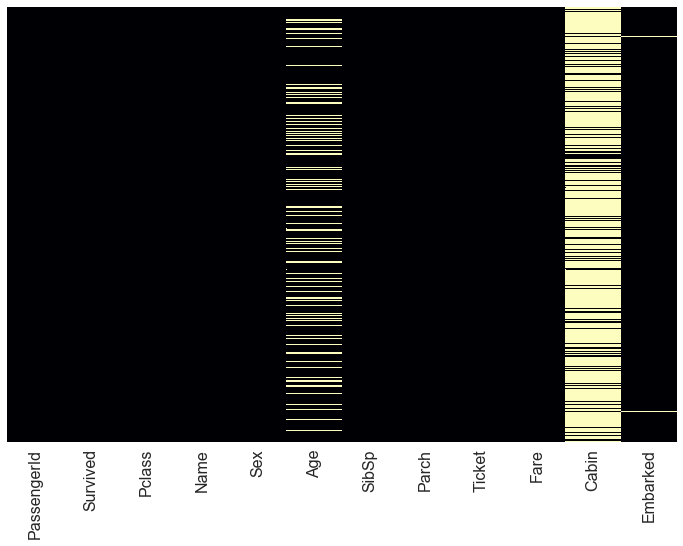

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(), cmap='magma', cbar=False, yticklabels=False)

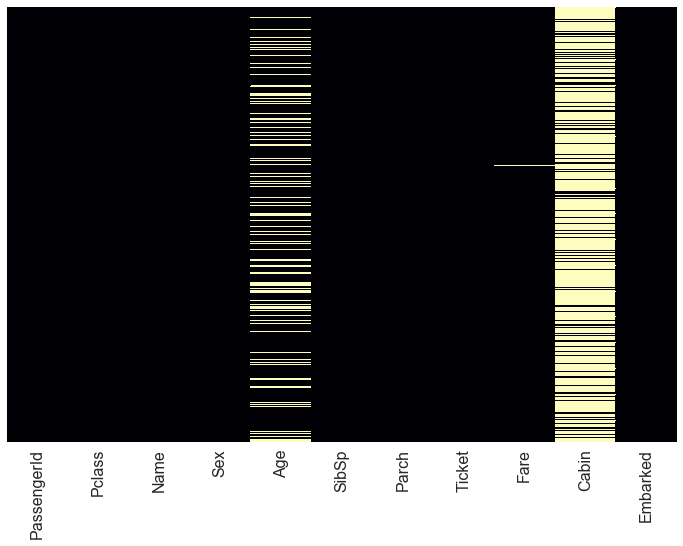

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_test.isnull(), cmap='magma', cbar=False, yticklabels=False)

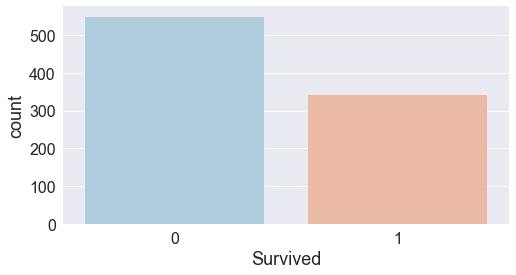

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x='Survived', data=df_train, palette='RdBu_r')

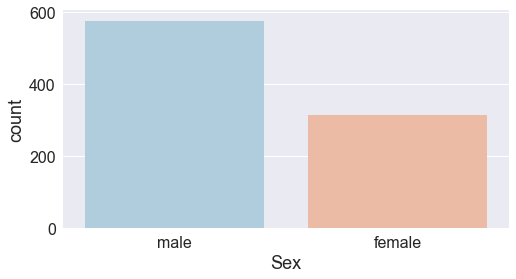

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sex', data=df_train, palette='RdBu_r')

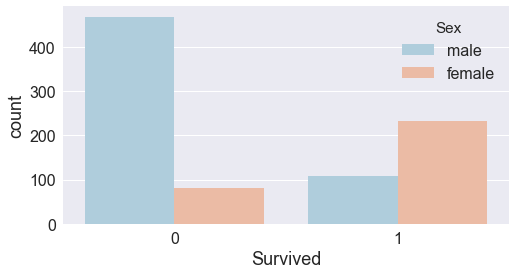

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='RdBu_r')

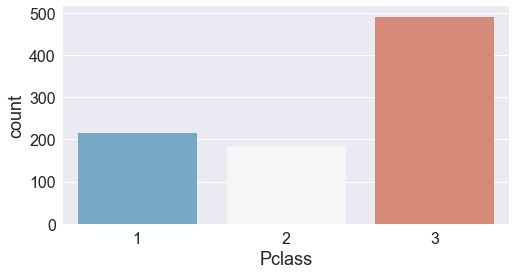

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='Pclass', data=df_train, palette='RdBu_r')

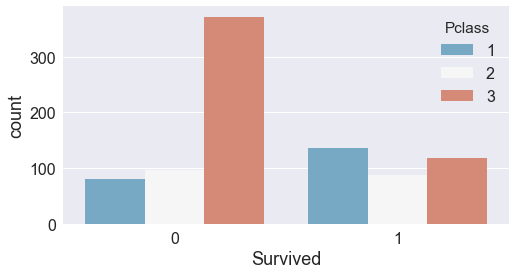

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='RdBu_r')

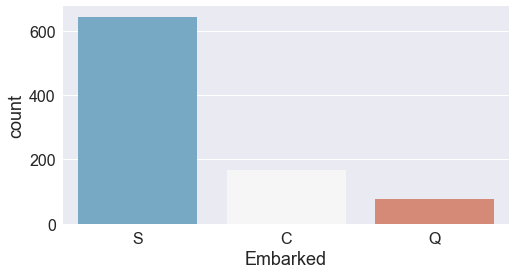

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='Embarked', data=df_train, palette='RdBu_r')

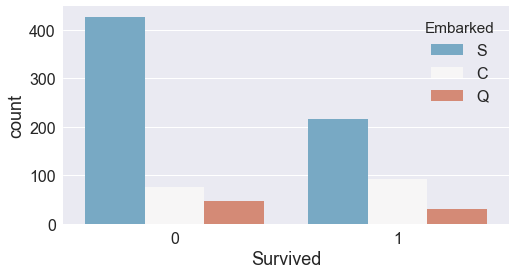

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='Survived', hue='Embarked', data=df_train, palette='RdBu_r')

Text(0.5,0,'Sex')

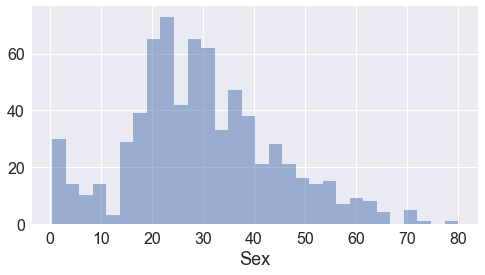

In [15]:
df_train['Age'].hist(bins=30, figsize=(8,4), alpha=0.5)
plt.xlabel('Sex')

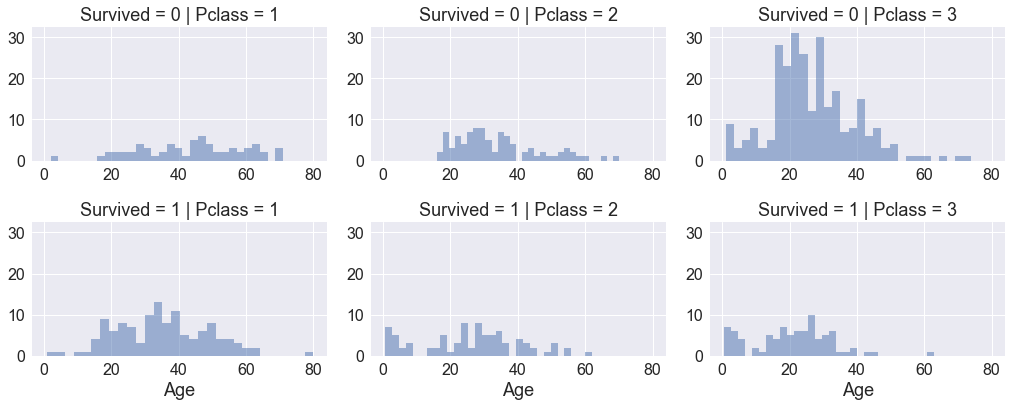

In [16]:
grid = sns.FacetGrid(data=df_train, row='Survived', col='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=30)

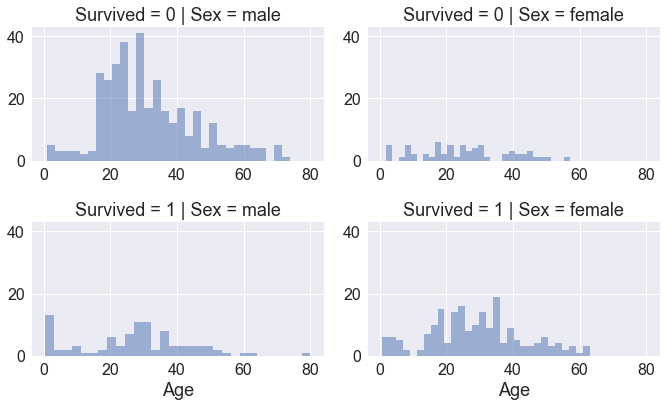

In [17]:
grid = sns.FacetGrid(data=df_train, row='Survived', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=30)

## Limpando os dados

In [18]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [19]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis= 1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis= 1)
df_full = [df_train, df_test]

In [20]:
embarked = {'S': 0, 'C' : 1, 'Q': 2}
sex = {'male': 0, 'female': 1}
for dataset in df_full:
    dataset['Embarked'] = dataset['Embarked'].fillna(df_train['Embarked'].dropna().mode()[0])
    dataset['Embarked'] = dataset['Embarked'].map(embarked)
for dataset in df_full:
    dataset['Sex'] = dataset['Sex'].map(sex)
print(df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('#'*40)
print(df_train['Embarked'].value_counts())
print('#'*40)
print(df_train['Sex'].value_counts())

   Embarked  Survived
1         1      0.55
2         2      0.39
0         0      0.34
########################################
0    646
1    168
2     77
Name: Embarked, dtype: int64
########################################
0    577
1    314
Name: Sex, dtype: int64


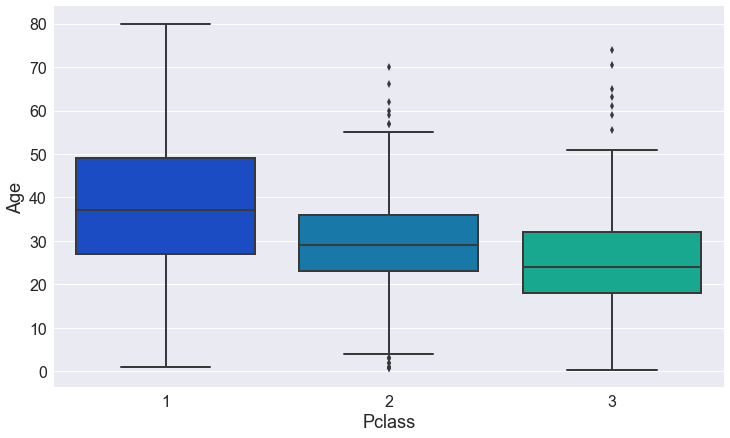

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [22]:
pri = df_train[['Age', 'Pclass']].groupby('Pclass', as_index=False).median()['Age'][0]
sec = df_train[['Age', 'Pclass']].groupby('Pclass', as_index=False).median()['Age'][1]
tri = df_train[['Age', 'Pclass']].groupby('Pclass', as_index=False).median()['Age'][2]
for dataset in df_full:
    dataset.loc[dataset['Pclass'] == 1, 'Age'] = dataset[dataset['Pclass'] == 1]['Age'].fillna(pri)
    dataset.loc[dataset['Pclass'] == 2, 'Age'] = dataset[dataset['Pclass'] == 2]['Age'].fillna(sec)
    dataset.loc[dataset['Pclass'] == 3, 'Age'] = dataset[dataset['Pclass'] == 3]['Age'].fillna(tri)
    dataset['Age'] = dataset['Age'].astype(int)

In [23]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB
None


In [24]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.55
1,"(16.0, 32.0]",0.34
2,"(32.0, 48.0]",0.41
3,"(48.0, 64.0]",0.43
4,"(64.0, 80.0]",0.09


In [25]:
for dataset in df_full:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) &  (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) &  (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) &  (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
df_train = df_train.drop(['AgeBand'], axis=1)
df_full = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.25,0
1,1,1,1,2,1,0,71.28,1
2,1,3,1,1,0,0,7.92,0
3,1,1,1,2,1,0,53.10,0
4,0,3,0,2,0,0,8.05,0


In [26]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.20
1,"(7.91, 14.454]",0.30
2,"(14.454, 31.0]",0.45
3,"(31.0, 512.329]",0.58


In [27]:
df_test.dropna(inplace=True)

In [28]:
for dataset in df_full:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
df_train = df_train.drop(['FareBand'], axis=1)
df_full = [df_train, df_test]

df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0
5,0,3,0,1,0,0,1,2
6,0,1,0,3,0,0,3,0
7,0,3,0,0,3,1,2,0
8,1,3,1,1,0,2,1,0
9,1,2,1,0,1,0,2,1


In [29]:
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,0,0,0,2
1,3,1,2,1,0,0,0
2,2,0,3,0,0,1,2
3,3,0,1,0,0,1,0
4,3,1,1,1,1,1,0
5,3,0,0,0,0,1,0
6,3,1,1,0,0,0,2
7,2,0,1,1,1,2,0
8,3,1,1,0,0,0,1
9,3,0,1,2,0,2,0


# Aplicando tecnicas de Machine Learning

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived',axis=1), 
                                                    df_train['Survived'], test_size=0.30)

In [44]:
# regression logistic

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.84      0.87       179
          1       0.71      0.79      0.75        89

avg / total       0.83      0.82      0.83       268



In [45]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.91      0.90       179
          1       0.81      0.75      0.78        89

avg / total       0.86      0.86      0.86       268



In [46]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.91      0.90       179
          1       0.81      0.75      0.78        89

avg / total       0.86      0.86      0.86       268



In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

88.120000000000005